# Street network bearings
Taking Binjiang as an example, calculate street network bearings and visualize the spatial orientation of a street network.

In [2]:
import osmnx as ox, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline
ox.config(log_console=True, use_cache=True)

### First, look at a non-grid street network

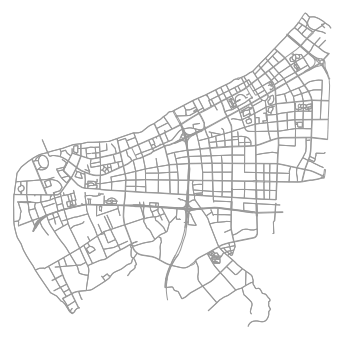

In [3]:
G = ox.graph_from_place('Binjiang District, Hangzhou City, China', network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

In [4]:
G = ox.add_edge_bearings(G)
data = pd.Series([data for u, v, k, data in G.edges(keys=True, data=True)])
data[0]

{'bearing': 1.001,
 'geometry': <shapely.geometry.linestring.LineString at 0x7f5e129ccac8>,
 'highway': 'residential',
 'length': 134.212,
 'oneway': False,
 'osmid': 358935331}

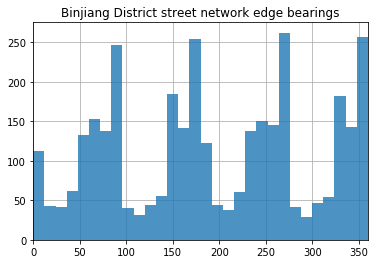

In [5]:
bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('Binjiang District street network edge bearings')
plt.show()

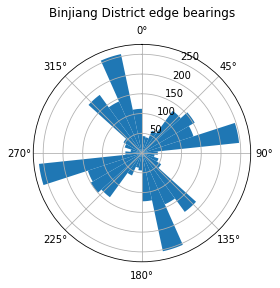

In [6]:

# polar plot
import numpy as np
n = 30
count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=0.0)
ax.set_title('Binjiang District edge bearings', y=1.1)
plt.show()